# CS 477 HW 7: Gradient Descent on Neural Networks
## Chris Tralie

This is a simple test to make sure our neural network engine is able to separate the inside of a circle from the outside, which would not work with logistic regression over the two dimensions

In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display as ipd
from neuralnet import *
from layers import *
from losses import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's generate the data

Text(0.5, 1.0, 'Intial Disc Data')

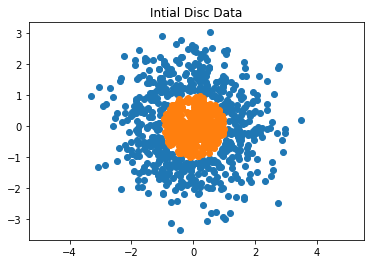

In [9]:
def get_disc_points(N):
    X = np.random.randn(N, 2)
    d = np.sqrt(np.sum(X**2, axis=1))
    ys = np.array(d < 1, dtype=float)
    X[ys == 0, :] *= 1.1 # Put a small gap between inner and outer points
    return X, ys

np.random.seed(0)
X, ys = get_disc_points(1000)
plt.scatter(X[ys==0, 0], X[ys==0, 1])
plt.scatter(X[ys==1, 0], X[ys==1, 1])
plt.axis("equal")
plt.title("Intial Disc Data")

Here's some code we'll use to plot the second to last layer with two neurons, which will indicate how well the last linear separator can do

In [10]:
def plot_2d_separator_predictions(X1, X2, a, b, c, draw_lines=False):
    """
    Plot the performance of a 2D linear separator on a set of binary labeled data.
    This is applicable to any layer which takes two neurons to one
    
    Parameters
    ----------
    X1: ndarray(N1, 2)
        Input coordinates for class 1
    X2: ndarray(N, 2)
        Input coordinates for class 2
    a: float
        Weight for first coordinate
    b: float
        Weight for second coordinate
    c: float
        Bias
    """
    plot = [plt.scatter(X1[:, 0], X1[:, 1], 1, c='C0')]
    plot.append(plt.scatter(X2[:, 0], X2[:, 1], 1, c='C1'))
    X = np.concatenate((X1, X2), axis=0)
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    p0 = -c*np.array([a, b])/(a**2 + b**2)
    v = np.array([-b, a])
    mag = np.sqrt(np.sum(v**2))
    if mag > 0:
        v = v/mag
        p = p0 - 2*iv*v
        q = p0 + 2*iv*v
        plot += plt.plot([p[0], q[0]], [p[1], q[1]], c='k', linestyle='--')
        rg = xmax[0] - xmin[0]
        plt.xlim([xmin[0]-0.2*rg, xmax[0]+0.2*rg])
        rg = xmax[1] - xmin[1]
        plt.ylim([xmin[1]-0.2*rg, xmax[1]+0.2*rg])

        wrong = 0
        for x in X1:
            proj = p0 + np.sum(v*(x-p0))*v
            y = a*x[0] + b*x[1] + c
            if draw_lines:
                plot += plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C0', linewidth=1, linestyle='--')
            if y > 0:
                plot.append(plt.scatter([x[0]], [x[1]], 1, c='C0', marker='x'))
                wrong += 1
        for x in X2:
            proj = p0 + np.sum(v*(x-p0))*v
            if draw_lines:
                plot += plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C1', linewidth=1, linestyle='--')
            y = a*x[0] + b*x[1] + c
            if y < 0:
                plot.append(plt.scatter([x[0]], [x[1]], 1, c='C1', marker='x'))
                wrong += 1
    total = X1.shape[0] + X2.shape[0]
    plt.xticks([])
    plt.yticks([])
    plot.append(plt.text(0.5, 1.01,
                        "{} / {} Correct ({:.1f}%)".format(total-wrong, total, 100*(total-wrong)/total),
                        horizontalalignment='center', verticalalignment='bottom',
                        transform=plt.gca().transAxes, size='xx-large'))
    return plot

Finally, let's setup a neural network and train it!  We'll put 100 neurons in the first hidden layer, followed by 2 neurons, followed by a single neuron with the logistic activation.  Since the last hidden layer has 2 neurons, we can the coordinates on the data mapped through it to see how well it's being separated

Iteration 0 Loss [750.17675492]
Iteration 1 Loss [495.74321544]


<ipython-input-11-cb711c4bc71d>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
<ipython-input-11-cb711c4bc71d>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


Iteration 2 Loss [415.09291253]
Iteration 3 Loss [294.46355416]
Iteration 4 Loss [241.29441546]
Iteration 5 Loss [215.06616236]
Iteration 6 Loss [195.0696522]
Iteration 7 Loss [178.0096689]
Iteration 8 Loss [163.91889246]
Iteration 9 Loss [151.62725844]
Iteration 10 Loss [139.77590642]
Iteration 11 Loss [130.30157122]
Iteration 12 Loss [122.10177215]
Iteration 13 Loss [114.59109529]
Iteration 14 Loss [109.19328934]
Iteration 15 Loss [102.02319812]
Iteration 16 Loss [96.70737116]
Iteration 17 Loss [91.89881823]
Iteration 18 Loss [87.78099748]
Iteration 19 Loss [83.36278229]
Iteration 20 Loss [79.89911763]
Iteration 21 Loss [76.60070303]
Iteration 22 Loss [73.55211148]
Iteration 23 Loss [70.27121962]
Iteration 24 Loss [67.51725111]
Iteration 25 Loss [65.45111901]
Iteration 26 Loss [63.43567602]
Iteration 27 Loss [60.47918749]
Iteration 28 Loss [58.74788409]
Iteration 29 Loss [56.11835717]


MovieWriter ffmpeg unavailable; using Pillow instead.


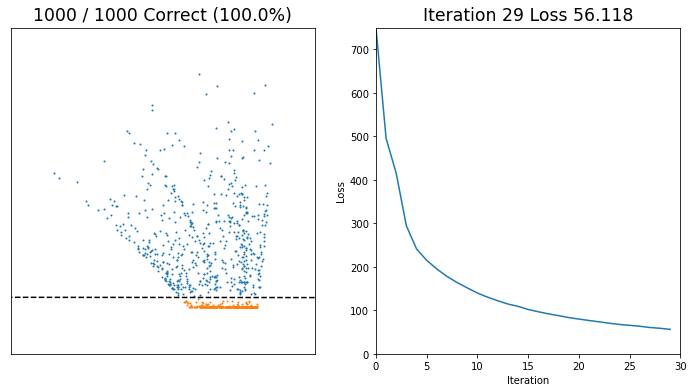

In [11]:
plot_animation=True
np.random.seed(3)

nn = NeuralNet(2, logistic_est_loss_deriv) # Input is in 2 dimensions, and we want to use logistic loss
nn.add_layer(100,  leaky_relu, leaky_relu_deriv) # First layer is 100 dimensions with a leaky ReLU
nn.add_layer(2, leaky_relu, leaky_relu_deriv) # Second layer is 2 dimensions with a leaky ReLU
nn.add_layer(1, logistic, None) # Last layer is the logistic function.  Its derivative is handled separately

n_iters = 30
alpha = 0.001
losses = []

fig = plt.figure(figsize=(12, 6))
frames = []
for it in range(n_iters):
    loss = 0
    X1 = []
    X2 = []
    for k in range(X.shape[0]):
        y_est = nn.forward(X[k, :])
        loss += logistic_est_loss(y_est, ys[k])
        if ys[k] == 0:
            X1.append(nn.h[2])
        else:
            X2.append(nn.h[2])
    print("Iteration {} Loss {}".format(it, loss))
    losses.append(loss)
    X1 = np.array(X1)
    X2 = np.array(X2)

    # Plot Result
    # Get the 2D linear separator from the weights/bias in the last layer
    a, b = nn.Ws[-1].flatten() 
    c = nn.bs[-1][0]
    plt.subplot(121)
    plot = plot_2d_separator_predictions(X1, X2, a, b, c)
    plt.gca().set_facecolor("white")
    plt.subplot(122)
    plot += plt.plot(losses, c='C0')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.xlim([0, n_iters])
    plt.ylim([0, np.max(losses)])
    plot.append(plt.text(0.5, 1.01, "Iteration {} Loss {:.3f}".format(it, loss[0]),
                        horizontalalignment='center', verticalalignment='bottom',
                        transform=plt.gca().transAxes, size='xx-large'))
    plt.gca().set_facecolor("white")
    frames.append(plot)
    
    # Stochastic gradient descent
    for k in np.random.permutation(X.shape[0]):
        nn.backprop_descent(X[k, :], ys[k], alpha)

ani = animation.ArtistAnimation(fig, frames, interval=200, blit=True, repeat_delay=1000)
ani.save("result.gif", dpi=200)


<BarContainer object of 10 artists>

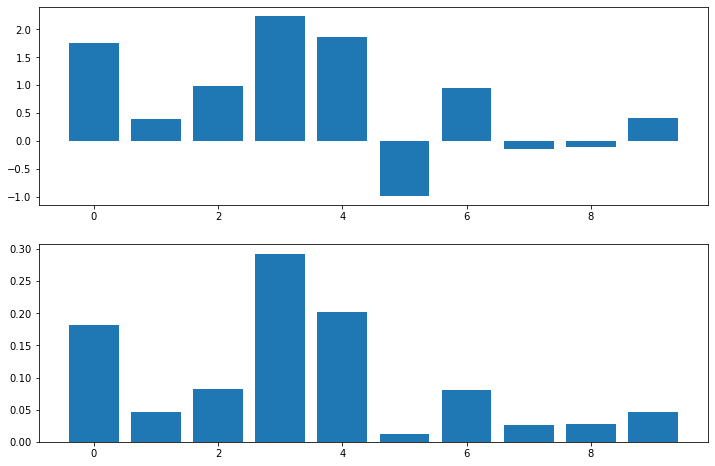

In [12]:
np.random.seed(0)
x = np.random.randn(10)
y = softmax(x)
plt.figure(figsize=(12, 8))
plt.subplot(211)
ts = np.arange(x.size)
plt.bar(ts, x)
plt.subplot(212)
plt.bar(ts, y)